In [73]:
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [52]:
np.random.seed(0)

In [53]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [54]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [55]:
assert(X_train.shape[0] == y_train.shape[0]) ,"The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]) ,"The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimension of the image are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimension of the image are not 28x28"

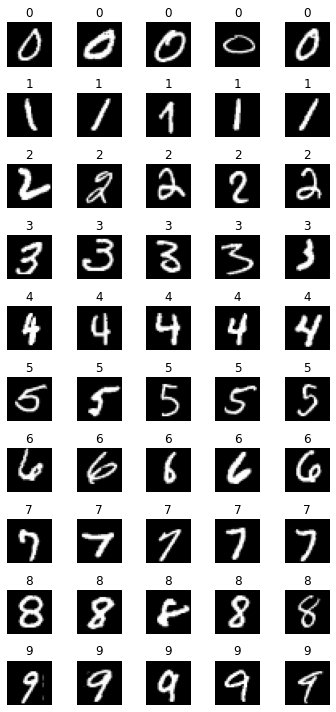

In [56]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axes = plt.subplots(num_classes, cols, figsize = (5,10))

for i in range(cols):

    for j in range(num_classes):

        x_selected = X_train[y_train == j]
        random = np.random.randint(0, len(x_selected)-1)
        axes[j][i].imshow(x_selected[random,:,:], cmap = plt.get_cmap("gray"))
        axes[j][i].set_title(y_train[y_train == j][random])
        axes[j][i].axis("off")

        if i == 2:
            num_of_samples.append(len(x_selected))

plt.tight_layout()
plt.show()

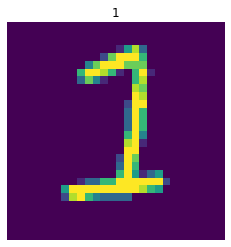

In [57]:
j = 1
x_selected = X_train[y_train == j]
random = np.random.randint(0, len(x_selected) - 1)
plt.imshow(x_selected[random,:,:])
plt.title(y_train[y_train == j][random])
plt.axis("off")
plt.show()

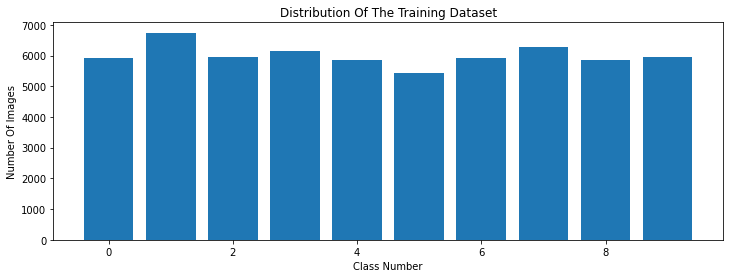

In [58]:
#print(num_of_samples)
plt.figure(figsize = (12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution Of The Training Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number Of Images")
plt.show()

In [59]:
y_train = tf.keras.utils.to_categorical(y_train,10) 
y_test  = tf.keras.utils.to_categorical(y_test,10)

y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [60]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [61]:
X_train = X_train / 255
X_test = X_test / 255

In [62]:
X_train = X_train.reshape( (len(X_train), X_train.shape[1]*X_train.shape[2]) )
X_test = X_test.reshape( (len(X_test), X_test.shape[1]*X_test.shape[2]) )

X_train.shape ,X_test.shape

((60000, 784), (10000, 784))

In [63]:
def create_model():

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units = 10, input_dim = 784, activation = "relu"))
    model.add(tf.keras.layers.Dense(units = 10,  activation = "relu"))
    model.add(tf.keras.layers.Dense(units = num_classes, activation = "softmax"))
    model.compile(tf.keras.optimizers.Adam(learning_rate = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])

    return model

In [64]:
model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
h = model.fit(X_train , y_train , validation_split = 0.1,epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0.5249 - accuracy: 0.8380 - val_loss: 0.2548 - val_accuracy: 0.9242
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2996 - accuracy: 0.9148 - val_loss: 0.2273 - val_accuracy: 0.9365
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2790 - accuracy: 0.9193 - val_loss: 0.2260 - val_accuracy: 0.9348
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2664 - accuracy: 0.9223 - val_loss: 0.2288 - val_accuracy: 0.9343
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.9257 - val_loss: 0.2112 - val_accuracy: 0.9417
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2551 - accuracy: 0.9254 - val_loss: 0.2150 - val_accuracy: 0.9417
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2446 - accuracy: 0.9290 - val_loss: 0.2102 - val_accuracy: 0.9397
Epoch 

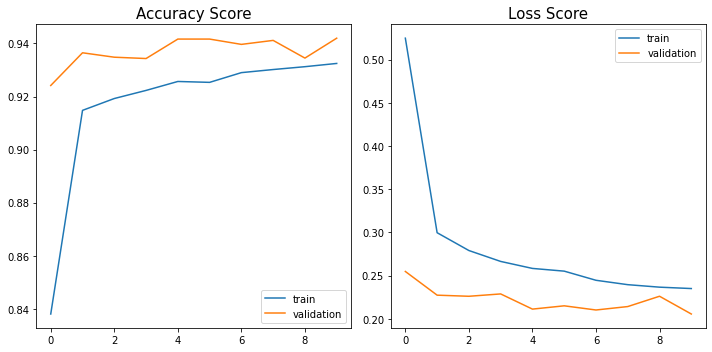

In [67]:
plt.figure(figsize= (10,5))

plt.subplot(121)
plt.plot(h.history["accuracy"], label = "train")
plt.plot(h.history["val_accuracy"], label = "validation")
plt.legend(loc = "best")
plt.title("Accuracy Score", fontsize = 15)

plt.subplot(122)
plt.plot(h.history["loss"], label = "train")
plt.plot(h.history["val_loss"], label = "validation")
plt.legend(loc = "best")
plt.title("Loss Score", fontsize = 15)

plt.tight_layout()
plt.show()

In [68]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Loss : ", score[0])
print("Accuracy : ", score[1])

Loss :  0.2442830502986908
Accuracy :  0.930400013923645


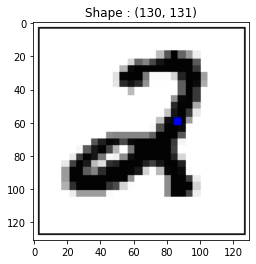

In [72]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url , stream = True)
# print(response)

img = Image.open(response.raw)

plt.imshow(img)
plt.title(f"Shape : {img.size}")
plt.show()

In [74]:
img_array = np.asarray(img)
print(img_array.shape)

(131, 130, 3)


(28, 28, 3)
(28, 28)


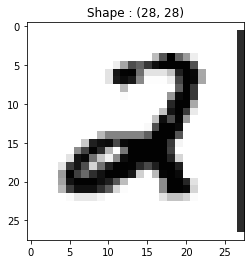

In [75]:
resized = cv2.resize(img_array, (28,28))
print(resized.shape)

gray = cv2.cvtColor(resized , cv2.COLOR_BGR2GRAY)
print(gray.shape)

plt.imshow(gray, cmap = "gray")
plt.title(f"Shape : {gray.shape}")
plt.show()

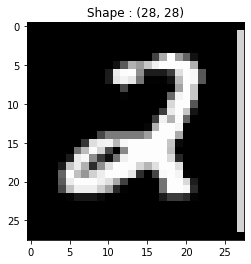

In [76]:
# Ama Arka Taraf Siyah Olmalı

image = cv2.bitwise_not(gray)

plt.imshow(image, cmap = "gray")
plt.title(f"Shape : {image.shape}")
plt.show()

In [77]:
image = image / 255
image.max(),image.min()

(0.996078431372549, 0.0)

In [78]:
pred = model.predict(image.reshape((1,28*28)))
pred = np.argmax(pred)

print("Prediction is : ",pred)

Prediction is :  2


--

In [79]:
(X_train,y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [80]:
def leNet_Model():

    model = tf.keras.models.Sequential()

    # 25 * 30 + 30 = 750 + 30 = 780
    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (5,5), input_shape = (28,28,1), strides = (1,1), padding = "valid" , activation = "relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3)))

    return model

In [81]:
deneme = leNet_Model()
deneme.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 30)         0         
 )                                                               
                                                                 
Total params: 780
Trainable params: 780
Non-trainable params: 0
_________________________________________________________________


In [82]:
X_train.shape

(60000, 28, 28)

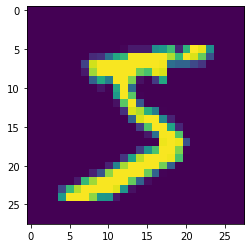

In [86]:
plt.imshow(X_train[0])
plt.show()

In [90]:
pred_zero = deneme.predict(X_train[0].reshape(1,28,28,1))
pred_zero.shape

(1, 8, 8, 30)

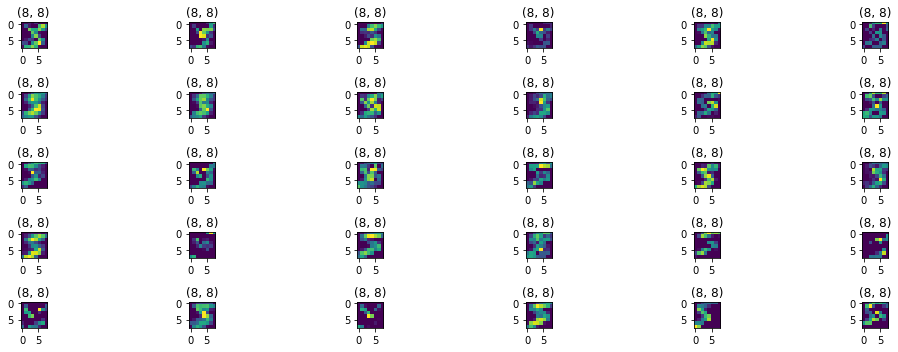

In [92]:
fig ,axes = plt.subplots(5,6 , figsize = (15,5))

axes = axes.ravel()

for i in range(len(axes)):

    
    axes[i].imshow(pred_zero[0,:,:,i])
    axes[i].set_title(pred_zero[0,:,:,i].shape)
    
plt.tight_layout()
plt.show()

In [94]:
def leNet_Model():

    model = tf.keras.models.Sequential()

    # 25 * 30 + 30 = 750 + 30 = 780
    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (5,5), input_shape = (28,28,1) , activation = "relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 15 * 30 * 3* 3 + 15 = 4065
    model.add(tf.keras.layers.Conv2D(filters = 15 , kernel_size = (3,3) , activation = "relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation = "relu"))
    model.add(tf.keras.layers.Dense(num_classes,activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])

    return model

In [95]:
model = leNet_Model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 135)               0         
                                                                 
 dense_9 (Dense)             (None, 500)              

In [97]:
X_train = X_train.reshape((len(X_train), 28,28,1))
X_test = X_test.reshape((len(X_test), 28,28,1))

X_test.shape,X_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [98]:
X_train = X_train / 255
X_test = X_test / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

X_train.max(),X_train.min(),X_test.max(),X_test.min()

(1.0, 0.0, 1.0, 0.0)

In [99]:
h = model.fit(X_train, y_train, epochs = 10 , validation_split = 0.1, verbose = 1,batch_size = 400, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 32s 232ms/step - loss: 0.2486 - accuracy: 0.9221 - val_loss: 0.0570 - val_accuracy: 0.9838
Epoch 2/10
135/135 [==============================] - 32s 236ms/step - loss: 0.0584 - accuracy: 0.9822 - val_loss: 0.0467 - val_accuracy: 0.9853
Epoch 3/10
135/135 [==============================] - 29s 213ms/step - loss: 0.0454 - accuracy: 0.9852 - val_loss: 0.0452 - val_accuracy: 0.9867
Epoch 4/10
135/135 [==============================] - 29s 215ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0406 - val_accuracy: 0.9890
Epoch 5/10
135/135 [==============================] - 29s 214ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0424 - val_accuracy: 0.9878
Epoch 6/10
135/135 [==============================] - 29s 214ms/step - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0354 - val_accuracy: 0.9890
Epoch 7/10
135/135 [==============================] - 29s 214ms/step - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.0368 - val_ac

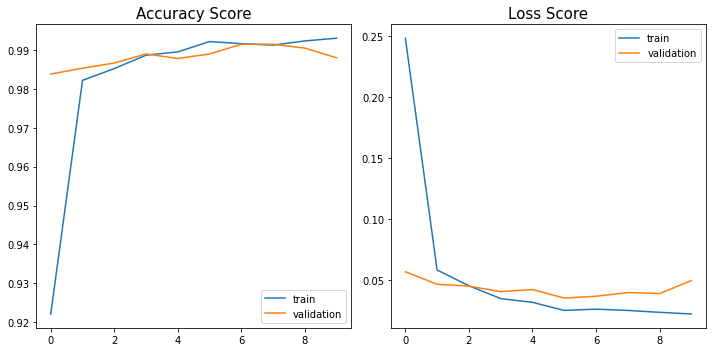

In [100]:
plt.figure(figsize= (10,5))

plt.subplot(121)
plt.plot(h.history["accuracy"], label = "train")
plt.plot(h.history["val_accuracy"], label = "validation")
plt.legend(loc = "best")
plt.title("Accuracy Score", fontsize = 15)

plt.subplot(122)
plt.plot(h.history["loss"], label = "train")
plt.plot(h.history["val_loss"], label = "validation")
plt.legend(loc = "best")
plt.title("Loss Score", fontsize = 15)

plt.tight_layout()
plt.show()

In [101]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Loss ", score[0] )
print("Accuracy ", score[1])

Loss  0.06139783933758736
Accuracy  0.9842000007629395


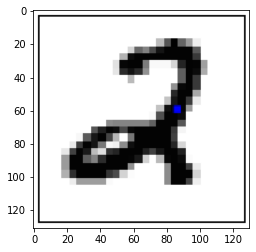

In [102]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img, cmap = plt.get_cmap("gray"))
plt.show()

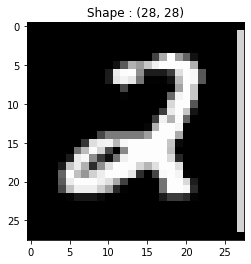

In [103]:
import cv2

img = np.array(img)
img = cv2.resize(img, (28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)

plt.imshow(img, cmap = "gray")
plt.title(f"Shape : {img.shape}")
plt.show()

In [104]:
img = img / 255
img = img.reshape((1,28,28,1))

pred = model.predict(img)
pred = np.argmax(pred)

print("Prediction is ", pred)

Prediction is  2


--

In [106]:
def leNet_Model():

    model = tf.keras.models.Sequential()

    # 25 * 30 + 30 = 750 + 30 = 780
    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (5,5), input_shape = (28,28,1) , activation = "relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    # 15 * 30 * 3* 3 + 15 = 4065
    model.add(tf.keras.layers.Conv2D(filters = 15 , kernel_size = (3,3) , activation = "relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation = "relu"))
    model.add(tf.keras.layers.Dropout(rate = 0.5 ))
    model.add(tf.keras.layers.Dense(num_classes,activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])

    return model

In [107]:
model = leNet_Model()

In [108]:
h = model.fit(X_train, y_train, epochs = 10 , validation_split = 0.1, verbose = 1,batch_size = 400, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 32s 228ms/step - loss: 0.2508 - accuracy: 0.9178 - val_loss: 0.0669 - val_accuracy: 0.9787
Epoch 2/10
135/135 [==============================] - 41s 302ms/step - loss: 0.0786 - accuracy: 0.9755 - val_loss: 0.0438 - val_accuracy: 0.9862
Epoch 3/10
135/135 [==============================] - 29s 212ms/step - loss: 0.0648 - accuracy: 0.9805 - val_loss: 0.0466 - val_accuracy: 0.9863
Epoch 4/10
135/135 [==============================] - 29s 212ms/step - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.0455 - val_accuracy: 0.9868
Epoch 5/10
135/135 [==============================] - 29s 213ms/step - loss: 0.0521 - accuracy: 0.9842 - val_loss: 0.0406 - val_accuracy: 0.9880
Epoch 6/10
135/135 [==============================] - 29s 214ms/step - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.0358 - val_accuracy: 0.9910
Epoch 7/10
135/135 [==============================] - 28s 210ms/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0377 - val_ac

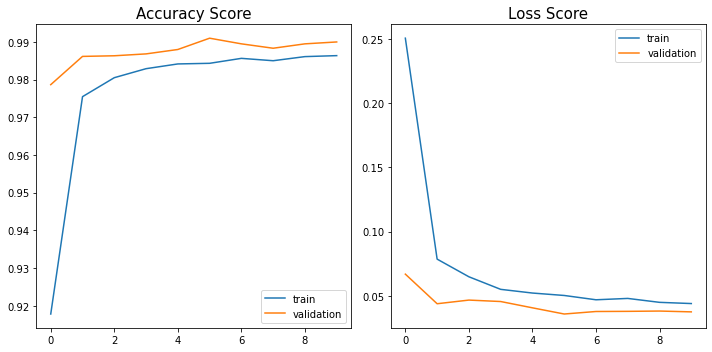

In [109]:
plt.figure(figsize= (10,5))

plt.subplot(121)
plt.plot(h.history["accuracy"], label = "train")
plt.plot(h.history["val_accuracy"], label = "validation")
plt.legend(loc = "best")
plt.title("Accuracy Score", fontsize = 15)

plt.subplot(122)
plt.plot(h.history["loss"], label = "train")
plt.plot(h.history["val_loss"], label = "validation")
plt.legend(loc = "best")
plt.title("Loss Score", fontsize = 15)

plt.tight_layout()
plt.show()

In [110]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Loss ", score[0] )
print("Accuracy ", score[1])

Loss  0.03670588508248329
Accuracy  0.9886000156402588


In [113]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 15)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 135)               0         
                                                                 
 dense_11 (Dense)            (None, 500)              

In [111]:
#layer1 = tf.keras.models.Model(inputs = model.layers[0].input, outputs = model.layers[0].output )
#layer2 = tf.keras.models.Model(inputs = model.layers[0].input, outputs = model.layers[2].output )

layer1 = tf.keras.models.Model(inputs = model.input, outputs = model.layers[0].output )
layer2 = tf.keras.models.Model(inputs = model.input, outputs = model.layers[2].output )

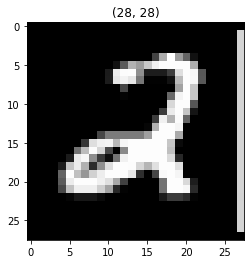

In [120]:
plt.imshow(img[0,:,:,0],cmap = "gray")
plt.title(img[0,:,:,0].shape)
plt.show()

In [112]:
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
visual_layer1.shape,visual_layer2.shape

((1, 24, 24, 30), (1, 10, 10, 15))

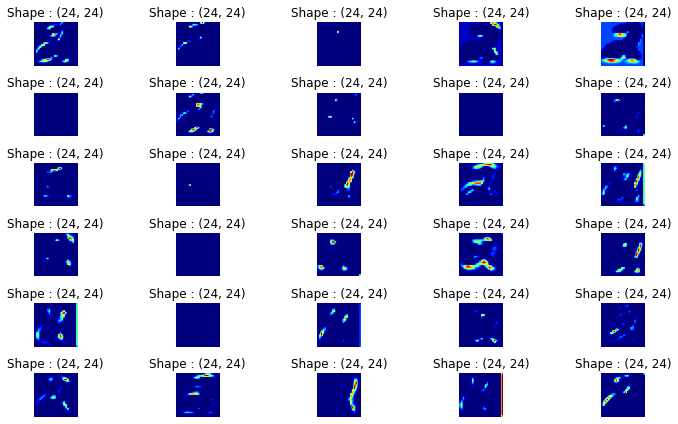

In [114]:
plt.figure(figsize = (10,6))
for i in range(30):
    select = visual_layer1[0,:,:,i]
    plt.subplot(6,5,i+1)
    plt.imshow(select,cmap = plt.get_cmap("jet"))
    plt.title(f"Shape : {select.shape}")
    plt.axis("off")

plt.tight_layout()
plt.show()

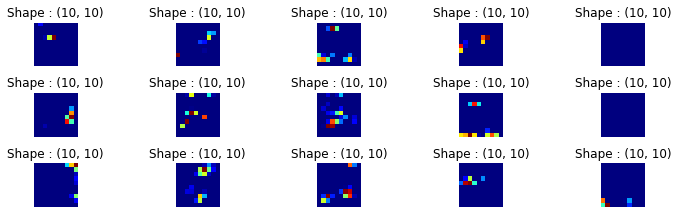

In [115]:
plt.figure(figsize = (10,6))
for i in range(15):
    select = visual_layer2[0,:,:,i]
    plt.subplot(6,5,i+1)
    plt.imshow(select,cmap = plt.get_cmap("jet"))
    plt.title(f"Shape : {select.shape}")
    plt.axis("off")

plt.tight_layout()
plt.show()